In [ ]:
#!pip install -q langchain python-dotenv langchain-openai langchain-core langchain-community bs4 faiss-cpu pypdf arxiv pymupdf wikipedia lxml langchain_huggingface langchain-groq langgraph langgraph-cli[inmem]

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import AIMessage, HumanMessage, AnyMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated
from IPython.display import Image, display

In [ ]:
import os

# from google.colab import userdata
# os.environ["OPENAI_API_KEY"]=userdata.get("OPENAI_API_KEY")


In [ ]:
llm=ChatOpenAI(model="gpt-4o")

In [ ]:
title_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert in generating catchy and engaging blog titles. Based on the user's input, create a single compelling title that is clear, concise, and relevant to the topic."),
        ("user", "{input}")
    ]
)

In [ ]:
blog_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert blog writer. Your task is to generate a well-structured, engaging, and informative blog post based on the user's input. Ensure the content is clear, detailed, and relevant to the given topic."),
        ("user", "{input}")
    ]
)

In [ ]:
title_generator = title_prompt | llm
blog_generator = blog_prompt | llm

In [ ]:
class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
def generate_title(state: MessageState) -> MessageState:
    user_input = state["messages"][0].content
    title_result = title_generator.invoke({"input": user_input})
    return {"messages": state["messages"] + [AIMessage(content=title_result.content)]}

In [ ]:
def generate_blog(state: MessageState) -> MessageState:
    title_content = state["messages"][-1].content
    blog_result = blog_generator.invoke({"input": title_content})
    return {"messages": state["messages"] + [AIMessage(content=blog_result.content)]}

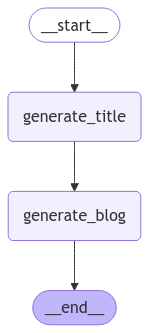

In [ ]:
# Build the state graph
builder = StateGraph(MessageState)
builder.add_node("generate_title", generate_title)
builder.add_node("generate_blog", generate_blog)
builder.add_edge(START, "generate_title")
builder.add_edge("generate_title", "generate_blog")
builder.add_edge("generate_blog", END)

# Compile and visualize the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
initial_message = HumanMessage(content="The impact of artificial intelligence on modern education")
state = {"messages": [initial_message]}
final_state = graph.invoke(state)

for m in final_state["messages"]:
    m.pretty_print()


================================ Human Message =================================

The impact of artificial intelligence on modern education
================================== Ai Message ==================================

"Revolutionizing Classrooms: How AI is Shaping the Future of Education"
================================== Ai Message ==================================

### Revolutionizing Classrooms: How AI is Shaping the Future of Education

In recent years, Artificial Intelligence (AI) has emerged as a transformative force across various industries, and education is no exception. From personalized learning experiences to automating administrative tasks, AI is poised to revolutionize how we approach education. In this blog post, we will explore the profound impacts AI is having on classrooms today and what this means for the future of learning.

#### Personalized Learning

One of the most significant contributions AI offers to education is the ability to tailor learning experience